In [2]:
import os
from PIL import Image
import random
import numpy as np

resolution = [100,100]
data = []
train_dataset_x = np.array([])
test_dataset_x = np.array([])

train_dataset_y = np.array([])
test_dataset_y = np.array([])

tmp_train = []
tmp_test = []

source_dir = 'datasets'

for nums in  os.listdir(source_dir):
    actual_num  = np.float(nums.split('_')[0])
    
    data = os.listdir(source_dir + '/' + nums)

    random.shuffle(data)
    
    
   
    for img in data[:int(len(data) * 0.9)]:
        img_tmp = Image.open(source_dir + '/' + nums + '/' + img).resize((resolution[0],resolution[1]))

        img_matrix = np.array(img_tmp).astype('uint8')
        
        train_dataset_y = np.append(train_dataset_y, actual_num)
        tmp_train.append(img_matrix)
    
    for img in data[-int(len(data) * 0.1):]:
        img_tmp = Image.open(source_dir + '/' + nums + '/' + img).resize((resolution[0],resolution[1]))
        img_matrix = np.array(img_tmp).astype('uint8')
        test_dataset_y = np.append(test_dataset_y, actual_num)
        tmp_test.append(img_matrix)
        
train_dataset_x = np.append(train_dataset_x ,tmp_train)
test_dataset_x = np.append(test_dataset_x ,tmp_test)


train_dataset_x = train_dataset_x.reshape((train_dataset_y.shape[0], resolution[0],resolution[1], 3))
test_dataset_x = test_dataset_x.reshape((test_dataset_y.shape[0], resolution[0],resolution[1], 3))


KeyboardInterrupt: 

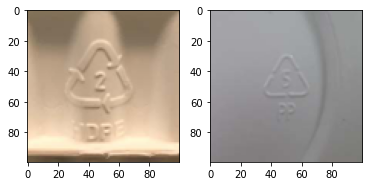

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
ax1.imshow(test_dataset_x[20].astype('uint8'))

ax2 = fig.add_subplot(122)
# 'nearest' interpolation - faithful but blocky
ax2.imshow(train_dataset_x[1].astype('uint8'))

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


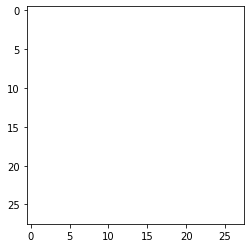

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
img = Image.open('seven_plastics/1_polyethylene_PET/85943598-ec9b-4da5-9221-8c32b5742e72.jpg')
numpydata = np.asarray(img)
 
# data
#print(numpydata)


def visualize_mnist(X, y):
    label_idx = [y == i for i in range(10)]
    #print(y)
    
    #ims = np.array([X[label_idx[i]][:10] for i in range(10)])

    classes = ['T-shirt/top']
    
    	
    fig, ax = plt.subplots()
    img = ax.imshow(X)
    	

    plt.show()
    return img

img = visualize_mnist(test_dataset_x[0], train_dataset_y[20])

In [52]:
img

In [37]:
train_dataset_x.shape

(613, 28, 28, 3)

In [31]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_circles, make_moons, make_blobs
from matplotlib import pyplot as plt
import numpy as np
import gzip
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, Flatten, MaxPooling2D
from keras import backend as K




In [63]:
input_shape = (resolution[0],resolution[1], 3)


cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
cnn.add(keras.layers.Dropout(0.4))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(keras.layers.Dropout(0.4))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(keras.layers.Dropout(0.4))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(keras.layers.Dropout(0.2))
cnn.add(Dense(200, activation='relu'))
cnn.add(keras.layers.Dropout(0.2))
cnn.add(Dense(200, activation='relu'))
cnn.add(keras.layers.Dropout(0.2))
cnn.add(Dense(200, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(0.001),  metrics=['accuracy'])

history = cnn.fit(train_dataset_x, train_dataset_y, epochs=40, batch_size=512, 
                  validation_split=0.1, verbose=True)



Epoch 1/40
2/2 [==============================] - 1s 672ms/step - loss: 163.6263 - accuracy: 0.0454 - val_loss: 288.6718 - val_accuracy: 0.0000e+00
Epoch 2/40
2/2 [==============================] - 1s 618ms/step - loss: 1471.4740 - accuracy: 0.1143 - val_loss: 63.2982 - val_accuracy: 0.0000e+00
Epoch 3/40
2/2 [==============================] - 1s 642ms/step - loss: 527.6710 - accuracy: 0.1506 - val_loss: 25.4300 - val_accuracy: 0.0000e+00
Epoch 4/40
2/2 [==============================] - 1s 640ms/step - loss: 181.8195 - accuracy: 0.2414 - val_loss: 4.4001 - val_accuracy: 0.0000e+00
Epoch 5/40
2/2 [==============================] - 1s 615ms/step - loss: 94.7328 - accuracy: 0.2523 - val_loss: 2.2987 - val_accuracy: 0.0323
Epoch 6/40
2/2 [==============================] - 1s 645ms/step - loss: 34.1768 - accuracy: 0.1742 - val_loss: 2.3080 - val_accuracy: 0.0000e+00
Epoch 7/40
2/2 [==============================] - 1s 669ms/step - loss: 11.2010 - accuracy: 0.1833 - val_loss: 2.3099 - val_a

In [46]:
test_dataset_x = test_dataset_x.reshape((test_dataset_y.shape[0], 28, 28, 3))

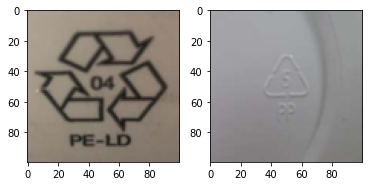

In [109]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
ax1.imshow(test_dataset_x[42].astype('uint8'))

ax2 = fig.add_subplot(122)
# 'nearest' interpolation - faithful but blocky
ax2.imshow(train_dataset_x[1].astype('uint8'))


In [108]:
prediction = cnn.predict(test_dataset_x[42].reshape(-1, 100, 100, 3))
prediction


array([[0.05537256, 0.12718074, 0.10742461, 0.05507988, 0.12933823,
        0.17215161, 0.10359282, 0.09697526, 0.08830144, 0.06458288]],
      dtype=float32)

In [107]:
test_dataset_x[1].reshape(-1, 100, 100, 3)

array([[[[ 45.,  41.,  32.],
         [ 43.,  39.,  30.],
         [ 42.,  38.,  29.],
         ...,
         [ 34.,  31.,  22.],
         [ 33.,  29.,  20.],
         [ 34.,  30.,  21.]],

        [[ 43.,  39.,  30.],
         [ 45.,  41.,  32.],
         [ 47.,  43.,  34.],
         ...,
         [ 39.,  36.,  27.],
         [ 38.,  34.,  25.],
         [ 37.,  33.,  24.]],

        [[ 44.,  40.,  31.],
         [ 43.,  39.,  30.],
         [ 49.,  45.,  36.],
         ...,
         [ 41.,  37.,  28.],
         [ 40.,  36.,  27.],
         [ 40.,  36.,  27.]],

        ...,

        [[108.,  91.,  70.],
         [111.,  93.,  72.],
         [117.,  99.,  76.],
         ...,
         [255., 255., 249.],
         [246., 247., 238.],
         [212., 214., 204.]],

        [[ 95.,  81.,  63.],
         [ 95.,  80.,  61.],
         [ 99.,  83.,  63.],
         ...,
         [205., 206., 193.],
         [170., 172., 159.],
         [129., 131., 118.]],

        [[ 85.,  73.,  56.],
       

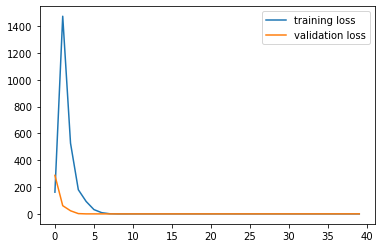

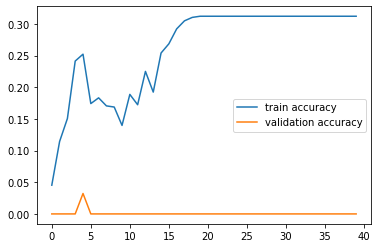

In [65]:
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.show()